In [1]:
import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import numpy as np

# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))
x_train = (x_train - mean) / (std + 1e-7)
x_valid = (x_valid - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 2. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# 3. Build the model
weight_decay = 1e-4
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Conv Block 2
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 3
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# GAP + Dense
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# 4. Compile and train
optimizer = Adam(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

checkpointer = ModelCheckpoint(
    filepath='model.best.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

batch_size = 128
epochs = 125

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_valid, y_valid),
    callbacks=[checkpointer, lr_scheduler],
    verbose=2
)

# 5. Evaluation
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\n Test Accuracy: %.2f%% | Test Loss: %.4f' % (scores[1] * 100, scores[0]))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


C:\Users\ghwns\anaconda3\envs\ml_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 290,090 (1.11 MB)

 Trainable params: 289,194 (1.10 MB)

 Non-trainable params: 896 (3.50 KB)

C:\Users\ghwns\anaconda3\envs\ml_env\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
C:\Users\ghwns\anaconda3\envs\ml_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/125

Epoch 1: val_accuracy improved from -inf to 0.34720, saving model to model.best.keras
351/351 - 152s - 433ms/step - accuracy: 0.3099 - loss: 1.9638 - val_accuracy: 0.3472 - val_loss: 1.8041 - learning_rate: 1.0000e-04
Epoch 2/125


C:\Users\ghwns\anaconda3\envs\ml_env\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.34720 to 0.35220, saving model to model.best.keras
351/351 - 8s - 22ms/step - accuracy: 0.4141 - loss: 1.5475 - val_accuracy: 0.3522 - val_loss: 1.8016 - learning_rate: 1.0000e-04
Epoch 3/125

Epoch 3: val_accuracy improved from 0.35220 to 0.44680, saving model to model.best.keras
351/351 - 142s - 404ms/step - accuracy: 0.4174 - loss: 1.6206 - val_accuracy: 0.4468 - val_loss: 1.6068 - learning_rate: 1.0000e-04
Epoch 4/125

Epoch 4: val_accuracy did not improve from 0.44680
351/351 - 11s - 30ms/step - accuracy: 0.4219 - loss: 1.6440 - val_accuracy: 0.4466 - val_loss: 1.6122 - learning_rate: 1.0000e-04
Epoch 5/125

Epoch 5: val_accuracy improved from 0.44680 to 0.48280, saving model to model.best.keras
351/351 - 142s - 404ms/step - accuracy: 0.4658 - loss: 1.5082 - val_accuracy: 0.4828 - val_loss: 1.5647 - learning_rate: 1.0000e-04
Epoch 6/125

Epoch 6: val_accuracy improved from 0.48280 to 0.48460, saving model to model.best.keras
351/351 - 8s - 22

Epoch 40/125

Epoch 40: val_accuracy did not improve from 0.67400

Epoch 40: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
351/351 - 6s - 18ms/step - accuracy: 0.7031 - loss: 0.8207 - val_accuracy: 0.6678 - val_loss: 1.0106 - learning_rate: 1.0000e-04
Epoch 41/125

Epoch 41: val_accuracy did not improve from 0.67400
351/351 - 149s - 424ms/step - accuracy: 0.6789 - loss: 0.9413 - val_accuracy: 0.6636 - val_loss: 1.0044 - learning_rate: 5.0000e-05
Epoch 42/125

Epoch 42: val_accuracy did not improve from 0.67400
351/351 - 11s - 31ms/step - accuracy: 0.7031 - loss: 0.8324 - val_accuracy: 0.6640 - val_loss: 1.0070 - learning_rate: 5.0000e-05
Epoch 43/125

Epoch 43: val_accuracy improved from 0.67400 to 0.68520, saving model to model.best.keras
351/351 - 147s - 420ms/step - accuracy: 0.6833 - loss: 0.9278 - val_accuracy: 0.6852 - val_loss: 0.9522 - learning_rate: 5.0000e-05
Epoch 44/125

Epoch 44: val_accuracy did not improve from 0.68520
351/351 - 9s - 25ms/step - accu

Epoch 78/125

Epoch 78: val_accuracy did not improve from 0.70620
351/351 - 11s - 31ms/step - accuracy: 0.7969 - loss: 0.6868 - val_accuracy: 0.7030 - val_loss: 0.8941 - learning_rate: 3.1250e-06
Epoch 79/125

Epoch 79: val_accuracy did not improve from 0.70620
351/351 - 144s - 412ms/step - accuracy: 0.7077 - loss: 0.8575 - val_accuracy: 0.7044 - val_loss: 0.8894 - learning_rate: 3.1250e-06
Epoch 80/125

Epoch 80: val_accuracy did not improve from 0.70620
351/351 - 5s - 14ms/step - accuracy: 0.7188 - loss: 0.8645 - val_accuracy: 0.7044 - val_loss: 0.8891 - learning_rate: 3.1250e-06
Epoch 81/125

Epoch 81: val_accuracy did not improve from 0.70620

Epoch 81: ReduceLROnPlateau reducing learning rate to 1.56249996052793e-06.
351/351 - 149s - 424ms/step - accuracy: 0.7102 - loss: 0.8584 - val_accuracy: 0.7044 - val_loss: 0.8830 - learning_rate: 3.1250e-06
Epoch 82/125

Epoch 82: val_accuracy did not improve from 0.70620
351/351 - 8s - 23ms/step - accuracy: 0.6172 - loss: 1.0252 - val_accur

351/351 - 5s - 15ms/step - accuracy: 0.7109 - loss: 0.8177 - val_accuracy: 0.7058 - val_loss: 0.8867 - learning_rate: 2.4414e-08
Epoch 117/125

Epoch 117: val_accuracy did not improve from 0.70660
351/351 - 144s - 410ms/step - accuracy: 0.7093 - loss: 0.8539 - val_accuracy: 0.7064 - val_loss: 0.8866 - learning_rate: 1.2207e-08
Epoch 118/125

Epoch 118: val_accuracy did not improve from 0.70660
351/351 - 11s - 30ms/step - accuracy: 0.6719 - loss: 0.9816 - val_accuracy: 0.7062 - val_loss: 0.8866 - learning_rate: 1.2207e-08
Epoch 119/125

Epoch 119: val_accuracy did not improve from 0.70660
351/351 - 142s - 403ms/step - accuracy: 0.7132 - loss: 0.8509 - val_accuracy: 0.7058 - val_loss: 0.8866 - learning_rate: 1.2207e-08
Epoch 120/125

Epoch 120: val_accuracy did not improve from 0.70660
351/351 - 6s - 16ms/step - accuracy: 0.6484 - loss: 0.9486 - val_accuracy: 0.7058 - val_loss: 0.8867 - learning_rate: 1.2207e-08
Epoch 121/125

Epoch 121: val_accuracy improved from 0.70660 to 0.70680, sav

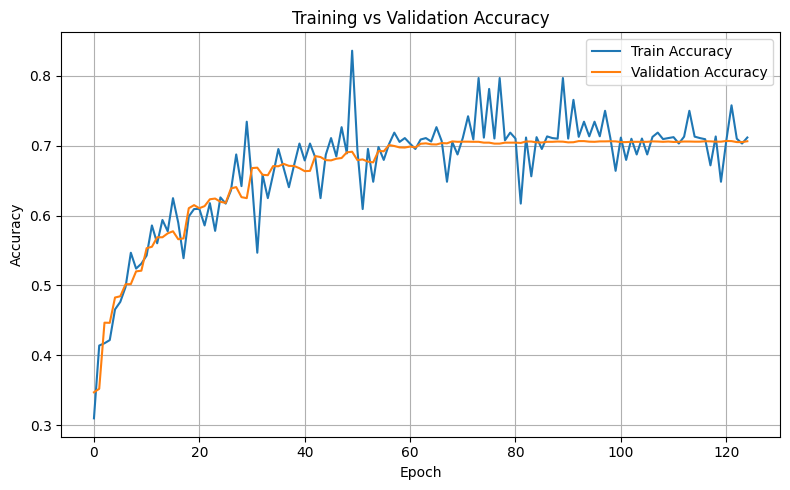

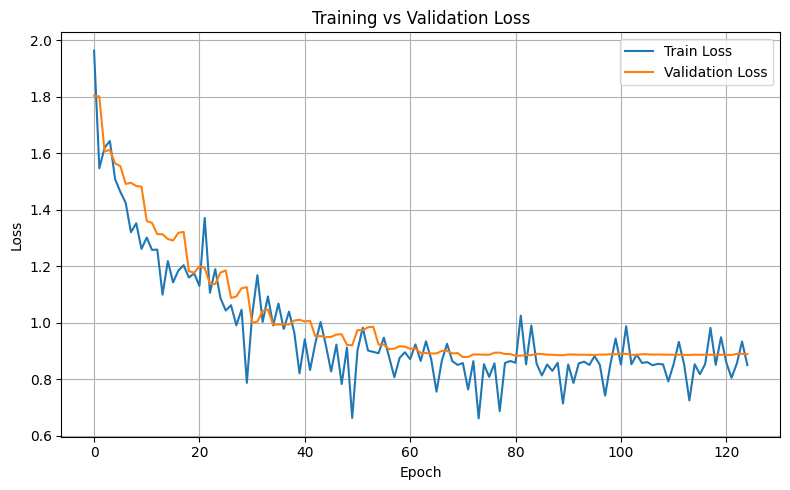

In [2]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_plot.png')
plt.show()

# Loss plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_plot.png')
plt.show()

# Learning rate plot (if ReduceLROnPlateau is used)
if 'lr' in history.history:
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['lr'], label='Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.title('Learning Rate over Epochs')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('lr_schedule.png')
    plt.show()
